In [51]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
file = 'Final triplets.xlsx'
df = pd.read_excel(file)
df.head()

,Final triplets
0,"{'subject': 'ISO 12100', 'relation': 'contains..."
1,"{'subject': 'Risk assessment', 'relation': 'co..."
2,{'subject': 'Determination of limits of machin...
3,"{'subject': 'Risk reduction', 'relation': 'con..."
4,"{'subject': 'Inherently safe design measures',..."


In [53]:
triples = [{'subject': 'ISO 12100', 'relation': 'contains', 'object': 'strategy for risk assessment'}, {'subject': 'ISO 12100', 'relation': 'contains', 'object': 'strategy for risk reduction'},
{'subject': 'Risk assessment', 'relation': 'contains', 'object': 'General information'}, {'subject': 'Risk assessment', 'relation': 'contains', 'object': 'Information for risk assessment'}, {'subject': 'Risk assessment', 'relation': 'contains', 'object': 'Hazard identification'}, {'subject': 'Risk assessment', 'relation': 'contains', 'object': 'Risk estimation'}, {'subject': 'Risk assessment', 'relation': 'contains', 'object': 'Risk evaluation'},
{'subject': 'Determination of limits of machinery', 'relation': 'contains', 'object': 'General information'}, {'subject': 'Determination of limits of machinery', 'relation': 'contains', 'object': 'Use limits'}, {'subject': 'Determination of limits of machinery', 'relation': 'contains', 'object': 'Space limits'}, {'subject': 'Determination of limits of machinery', 'relation': 'contains', 'object': 'Time limits'}, {'subject': 'Determination of limits of machinery', 'relation': 'contains', 'object': 'Other limits'}, {'subject': 'Risk estimation', 'relation': 'contains', 'object': 'General information'}, {'subject': 'Risk estimation', 'relation': 'contains', 'object': 'Elements of risk'}, {'subject': 'Risk estimation', 'relation': 'contains', 'object': 'Aspects to be considered during risk estimation'}, {'subject': 'Risk evaluation', 'relation': 'contains', 'object': 'General information'}, {'subject': 'Risk evaluation', 'relation': 'contains', 'object': 'Adequate risk reduction'}, {'subject': 'Risk evaluation', 'relation': 'contains', 'object': 'Comparision of risks'},
{'subject': 'Risk reduction', 'relation': 'contains', 'object': 'General information'}, {'subject': 'Risk reduction', 'relation': 'contains', 'object': 'Inherently safe design measures'}, {'subject': 'Risk reduction', 'relation': 'contains', 'object': 'Safeguarding and complementary protective measures'}, {'subject': 'Risk reduction', 'relation': 'contains', 'object': 'Information for use'},
{'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'General information'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Consideration of geometrical factors and physical aspects'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Taking into account general technical knowledge of machine design'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Choice of appropriate technology'},  {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Applying principle of positive mechanical action'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Provisions for stability'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Provisions for maintainability'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Observing ergonomic principles'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Electrical hazards'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Pneumatic and hydraulic hazards'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Applying inherently safe design measures to control systems'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Minimizing probability of failure of safety functions'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Limiting exposure to hazards through reliability of equipment'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Limiting exposure to hazards through mechanization or automation of loading (feeding)/unloading (removal) operations'}, {'subject': 'Inherently safe design measures', 'relation': 'contains', 'object': 'Limiting exposure to hazards through location of setting and maintenance points outside danger zones'}, {'subject': 'Safeguarding and complementary protective measures', 'relation': 'contains', 'object': 'General information'}, {'subject': 'Safeguarding and complementary protective measures', 'relation': 'contains', 'object': 'Selection and implementation of guards and protective devices'}, {'subject': 'Safeguarding and complementary protective measures', 'relation': 'contains', 'object': 'Requirements for design of guards and protective devices'}, {'subject': 'Safeguarding and complementary protective measures', 'relation': 'contains', 'object': 'Safeguarding to reduce emissions'}, {'subject': 'Safeguarding and complementary protective measures', 'relation': 'contains', 'object': 'Complementary protective measures'}, {'subject': 'Information for use', 'relation': 'contains', 'object': 'General requirements'}, {'subject': 'Information for use', 'relation': 'contains', 'object': 'Location and nature of information for use'}, {'subject': 'Information for use', 'relation': 'contains', 'object': 'Signals and warning devices'}, {'subject': 'Information for use', 'relation': 'contains', 'object': 'Markings, signs (pictograms) and written warnings'}, {'subject': 'Information for use', 'relation': 'contains', 'object': 'Accompanying documents (in particular — instruction handbook)'},
{'subject': 'Documentation of risk assessment and risk reduction', 'relation': 'contains', 'object': 'Schematic representation of a machine'}, {'subject': 'Documentation of risk assessment and risk reduction', 'relation': 'contains', 'object': 'Examples of hazards, hazardous situations and hazardous events'}, {'subject': 'Documentation of risk assessment and risk reduction', 'relation': 'contains', 'object': 'Trilingual lookup and index of specific terms and expressions used in ISO 12100'}, {'subject': 'Documentation of risk assessment and risk reduction',  'relation': 'contains', 'object': 'Relationship between this European Standard and the Essential Requirements of EU Directive 2006/42/EC'},
{'subject': 'Clause 4', 'relation': 'is', 'object': 'Strategy for risk assessment and risk reduction'},
{'subject': 'designer', 'relation': 'shall take', 'object': 'actions'}, {'subject': 'designer', 'relation': 'implement', 'object': 'risk assessment'}, {'subject': 'designer', 'relation': 'shall take actions in', 'object': 'order given'},
{'subject': 'Action a', 'relation': 'is', 'object': 'Determination of the limits of the machinery'}, {'subject': 'Determination of the limits of the machinery', 'relation': 'includes', 'object': 'the intended use'}, {'subject': 'Determination of the limits of the machinery', 'relation': 'includes', 'object': 'any reasonably foreseeable misuse thereof'},
{'subject': 'Action b', 'relation': 'is', 'object': 'Hazard identification'}, {'subject': 'Hazard identification', 'relation': 'includes', 'object': 'identification of associated hazardous situations'},
{'subject': 'Action c', 'relation': 'is', 'object': 'Risk estimation'}, {'subject': 'Risk estimation', 'relation': 'includes', 'object': 'estimation of risk for each identified hazard'}, {'subject': 'Risk estimation', 'relation': 'includes', 'object': 'estimation of risk for each hazardous situation'},
{'subject': 'Action d', 'relation': 'is', 'object': 'Risk evaluation'}, {'subject': 'Risk evaluation', 'relation': 'includes', 'object': 'evaluation of risk'}, {'subject': 'Risk evaluation', 'relation': 'includes', 'object': 'taking decision for risk reduction'},
{'subject': 'Action e', 'relation': 'is', 'object': 'Risk elimination'}, {'subject': 'Risk elimination', 'relation': 'includes', 'object': 'eliminating the hazard'}, {'subject': 'Risk elimination', 'relation': 'includes', 'object': 'reduce the risk associated with the hazard'}, {'subject': 'reduce the risk associated with the hazard', 'relation': 'by means of', 'object': 'protective measures'},
{'subject': 'Figure 1', 'relation': 'is', 'object': 'Schematic representation of risk reduction process including iterative three-step method'}, {'subject': 'Figure 2', 'relation': 'is', 'object': 'Risk reduction process from point of view of designer'},
{'subject': 'Clause 5', 'relation': 'is', 'object': 'Risk assessment'},
{'subject': 'Risk assessment', 'relation': 'comprises', 'object': 'Risk analysis'},
{'subject': 'Risk analysis', 'relation': 'comprises', 'object': ' determination of the limits of the machinery'},
{'subject': 'Risk analysis', 'relation': 'comprises', 'object': 'hazard identification'},
{'subject': 'Risk analysis', 'relation': 'comprises', 'object': 'risk estimation'},
{'subject': 'Risk analysis', 'relation': 'comprises', 'object': 'risk evaluation'},
{'subject': 'Risk analysis', 'relation': 'provides information required for', 'object': 'risk evaluation'}, {'subject': 'Risk evaluation', 'relation': 'allows judgements for', 'object': 'risk reduction'}, {'subject': 'judgments', 'relation': 'supported by', 'object': 'qualitative estimate of the risk'}, {'subject': 'judgments', 'relation': 'supported by', 'object': 'quantitative estimate of the risk'}, {'subject': 'risk', 'relation': 'is associated with', 'object': 'hazard'}, {'subject': 'hazard', 'relation': 'is present on', 'object': 'machinery'},
{'subject': 'risk assessment', 'relation': 'is', 'object': 'documented'},
{'subject': 'Information for risk assessment', 'relation': 'includes', 'object': 'machinery description'},
{'subject': 'machinery description', 'relation': 'includes', 'object': 'user specifications'},
{'subject': 'machinery description', 'relation': 'includes', 'object': 'anticipated machinery specifications'},
{'subject': 'anticipated machinery specifications', 'relation': 'includes description of', 'object': 'machinery'}, {'subject': 'machinery', 'relation': 'has', 'object': 'lifecycle'}, {'subject': 'lifecycle', 'relation': 'has', 'object': 'phase'},
{'subject': 'anticipated machinery specifications', 'relation': 'includes', 'object': 'design drawings'}, {'subject': 'machinery', 'relation': 'has', 'object': 'design drawings'},
{'subject': 'anticipated machinery specifications', 'relation': 'includes', 'object': 'energy sources'}, {'subject': 'machinery', 'relation': 'supplied with', 'object': 'energy sources'},
{'subject': 'machinery description', 'relation': 'includes', 'object': 'documentation on previous designs'}, {'subject': 'machinery', 'relation': 'has', 'object': 'documentation on previous designs'},
{'subject': 'machinery description', 'relation': 'includes', 'object': 'information for use'}, {'subject': 'machinery', 'relation': 'has', 'object': 'information for use'},
{'subject': 'information for risk assessment', 'relation': 'includes', 'object': 'applicable documents'},
{'subject': 'applicable documents', 'relation': 'include', 'object': 'applicable regulations'},
{'subject': 'applicable documents', 'relation': 'include', 'object': 'relevant standards'},
{'subject': 'applicable documents', 'relation': 'include', 'object': 'relevant technical specifications'},
{'subject': 'applicable documents', 'relation': 'include', 'object': 'relevant safety data sheets'},
{'subject': 'information for risk assessment', 'relation': 'include', 'object': 'experience of use'},
{'subject': 'experience of use', 'relation': 'include', 'object': 'history'}, {'subject': 'accident', 'relation': 'has', 'object': 'history'}, {'subject': 'incident', 'relation': 'has', 'object': 'history'}, {'subject': 'malfunction', 'relation': 'has', 'object': 'history'},
{'subject': 'experience of use', 'relation': 'include', 'object': 'history'}, {'subject': 'damage to health', 'relation': 'has', 'object': 'history'}, {'subject': 'damage to health', 'relation': 'results from', 'object': 'emissions'}, {'subject': 'damage to health', 'relation': 'results from', 'object': 'chemicals used'}, {'subject': 'damage to health', 'relation': 'results from', 'object': 'materials processed'},
{'subject': 'experience of use', 'relation': 'include', 'object': 'experience of users'}, {'subject': 'information', 'relation': 'exchanged with', 'object': 'potential users'},
{'subject': 'Information for risk assessment', 'relation': 'include', 'object': 'Relevant ergonomic principles'},
{'subject': 'information', 'relation': 'updated with', 'object': 'design'},  {'subject': 'information', 'relation': 'updated with', 'object': 'modifications'}, {'subject': 'modifications', 'relation': 'required for', 'object': 'machines'}, {'subject': 'hazardous situation', 'relation': 'compared between', 'object': 'machinery'}, {'subject': 'machinery', 'relation': 'have', 'object': 'types'},  {'subject': 'comparisons', 'relation': 'associated with', 'object': 'types'}, {'subject': 'comparisons', 'relation': 'are possible with', 'object': 'information about hazards'}, {'subject': 'comparisons', 'relation': 'are possible with', 'object': 'information about accident circumstances'},
{'subject': 'data', 'relation': 'used for', 'object': 'quantitative analysis'}, {'subject': 'data', 'relation': 'comes from', 'object': 'databases'}, {'subject': 'data', 'relation': 'comes from', 'object': 'handbooks'}, {'subject': 'data', 'relation': 'comes from', 'object': 'laboratories'}, {'subject': 'data', 'relation': 'comes from', 'object': 'manufacturer specification'}, {'subject': 'data', 'relation': 'provided with', 'object': 'confidence'}, {'subject': 'confidence', 'relation': 'is in', 'object': 'suitability of data'}, {'subject': 'data', 'relation': 'contains', 'object': 'uncertainty'}, {'subject': 'uncertainty', 'relation': 'indicated in', 'object': 'documentation'}
]


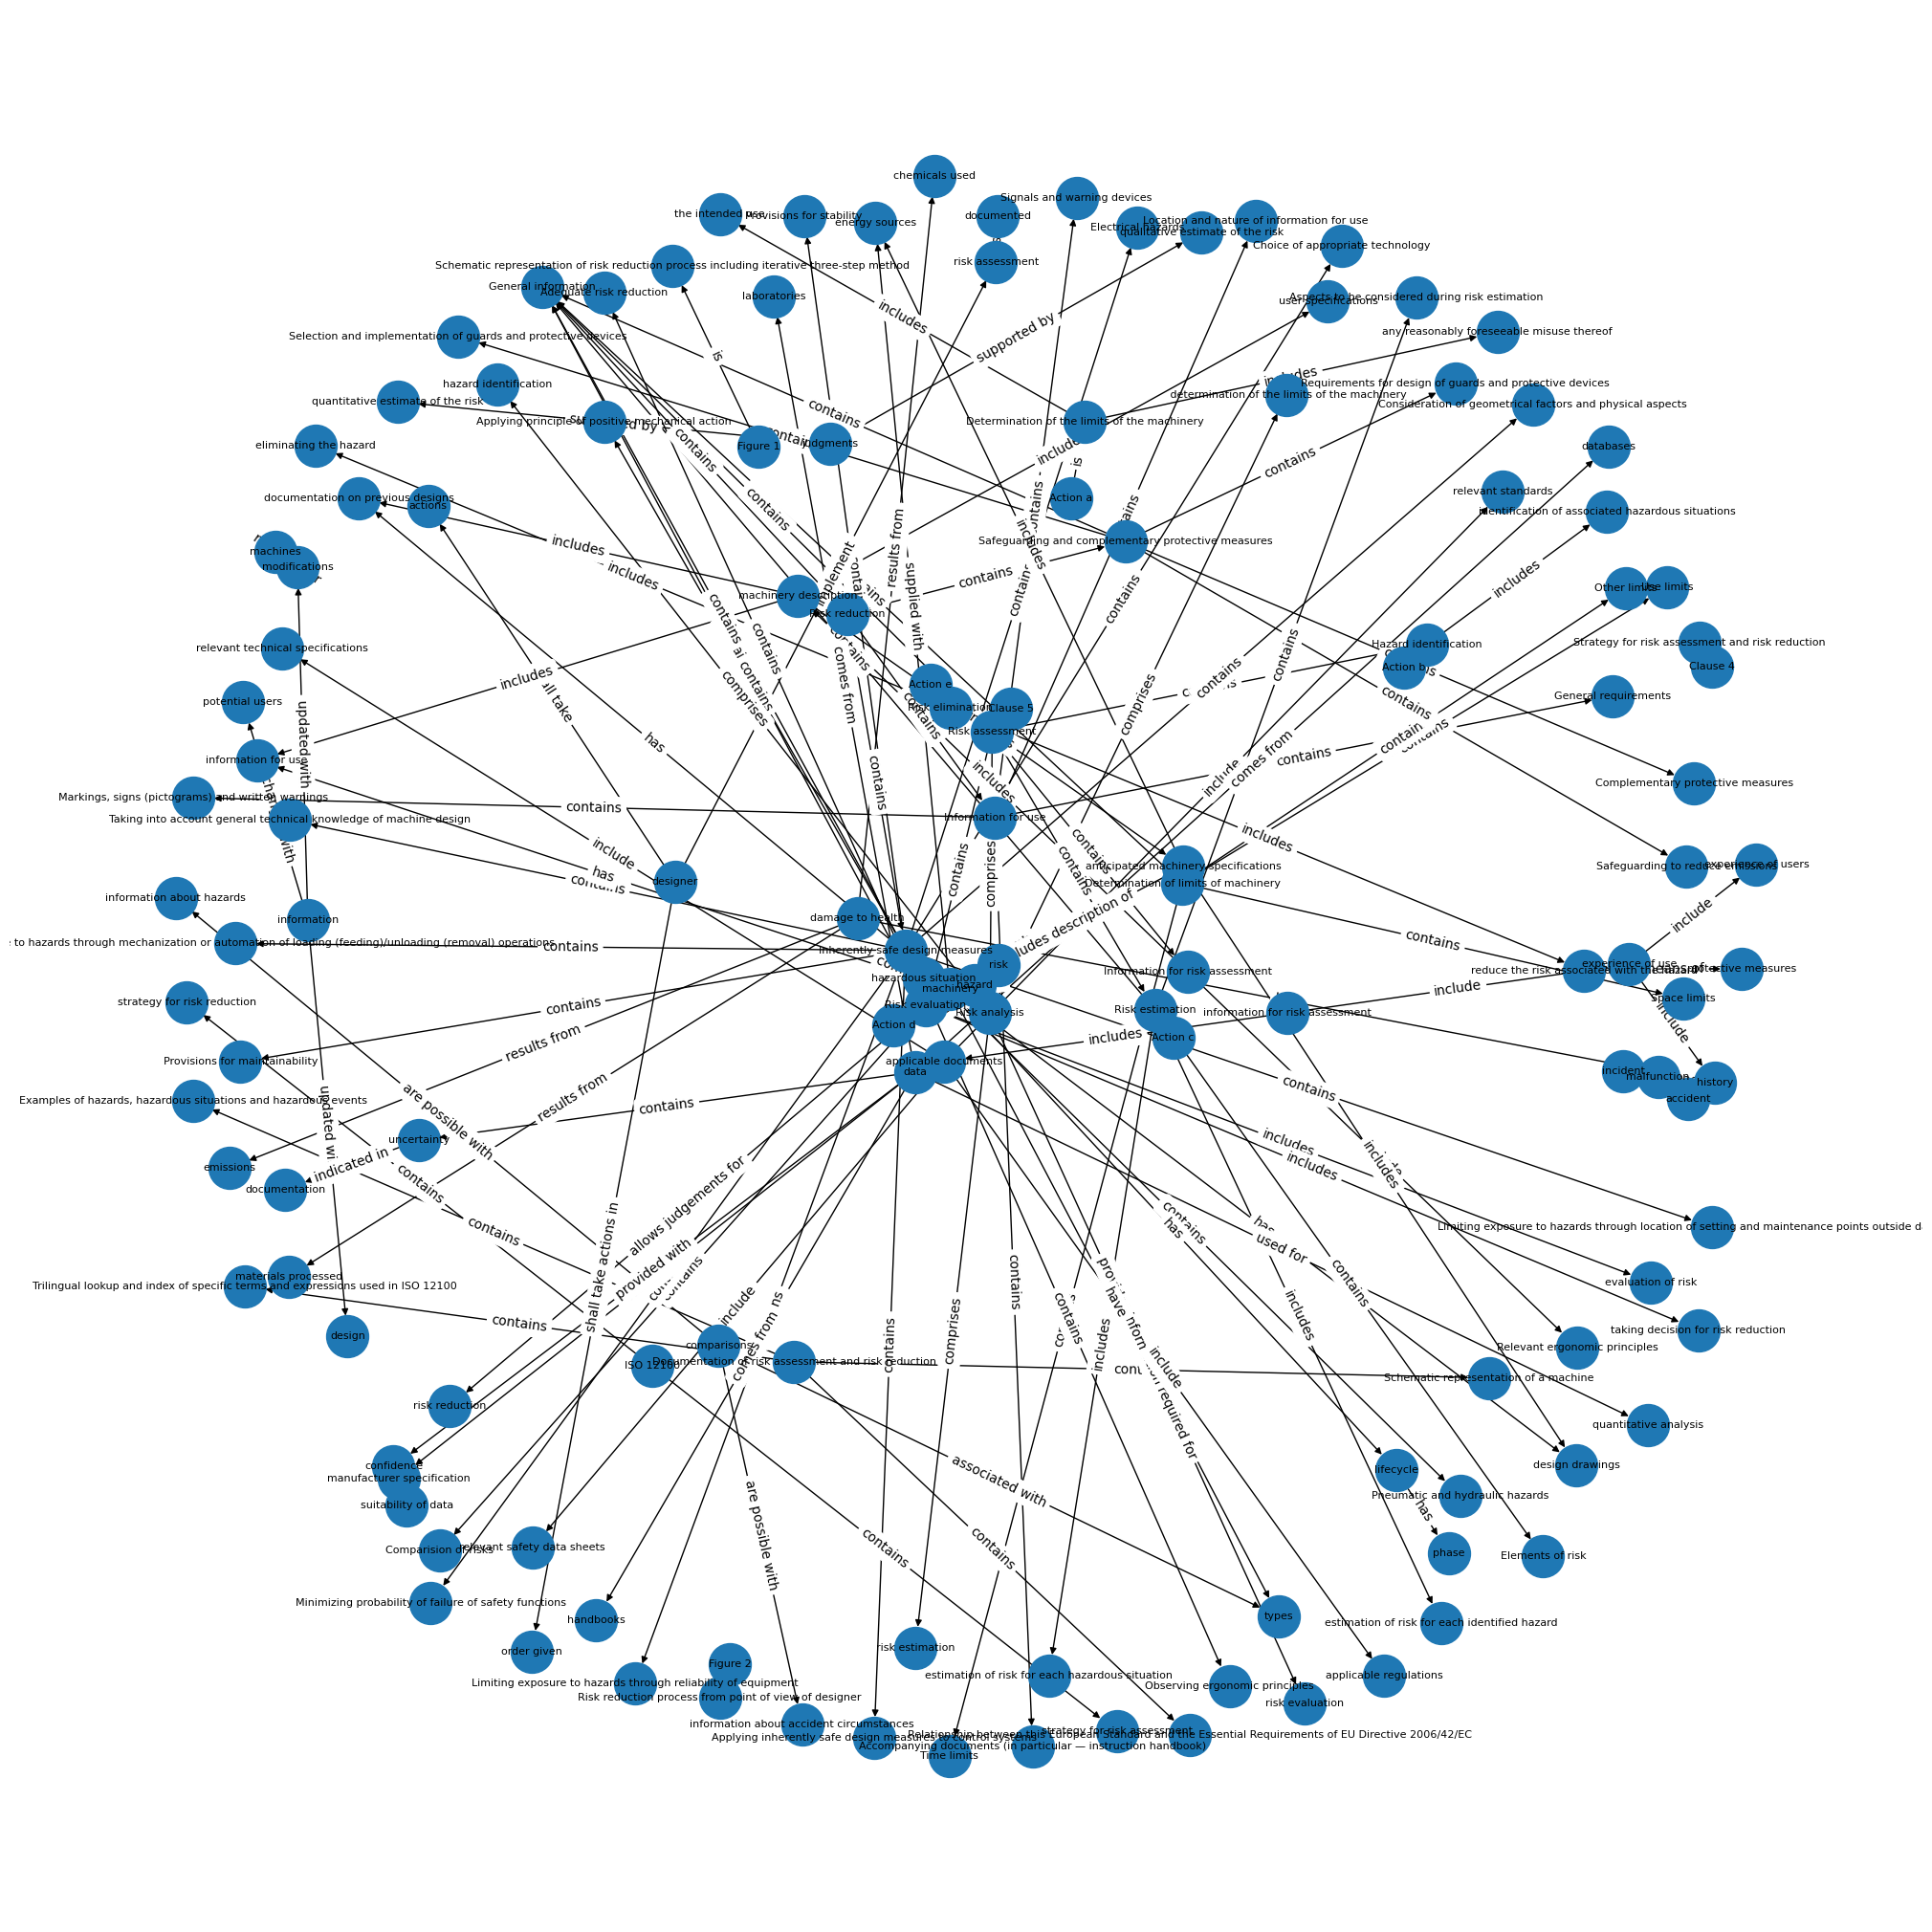

In [54]:

# Create an empty directed graph
G = nx.DiGraph()

# Create a list of dictionaries representing subject-object-relation triples
# triples = [{'subject': 'hazards', 'relation': 'associated', 'object': 'situations'}, {'subject': 'hazards', 'relation': 'associated', 'object': 'hazardous situations'}]
# triples = df.at[3,'Triples']

# Add the subject-object-relation triples as edges in the graph
for triple in triples:
    G.add_edge(triple['subject'], triple['object'], relation=triple['relation'])

plt.figure(figsize=(20,20))

# Visualize the graph
pos = nx.spring_layout(G)  # specify the layout
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8)  # draw the graph

# Add the relation text to the edges
relation_text = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=relation_text)

plt.show()
